# (Step 2) Identification of suitable image dataset for tree identification - PlantNet300

We identified 3 options to get image datasets

1) Leaves dataset: https://zenodo.org/record/4446955/files/Leaves.zip

2) PlantNet 300K image dataset: https://zenodo.org/record/5645731/files/plantnet_300K.zip

3) Download from Binge

This notebook explored the usability of the **PlantNet-300K image dataset** and their the proposed **neural network using "resnet50"**. 
"Pl@ntNet-300K: a plant image dataset with high label ambiguity and a long-tailed distribution".
(https://github.com/plantnet/PlantNet-300K)

Paper:"Pl@ ntNet-300K: a plant image dataset with high label ambiguity and a long-tailed distribution},
Garcin, Camille and Joly, Alexis and Bonnet, Pierre and Lombardo, Jean-Christophe and Affouard, Antoine and Chouet, Mathias and Servajean, Maximilien and Salmon, Joseph and Lorieul, Titouan; NeurIPS 2021-35th Conference on Neural Information Processing Systems, 2021"


We explored the image dataset and if we could use their proposed NN model. 

**Results**
The training set contained 3812 images and the validation set 487. Each epoch needed about 1 h to run. The following statistics showed that there was an increase in accuracy with already one epoch.

**epoch 0**:
- loss_train : 4.46
- loss_val : 3.99
- acc_train : 0.15
- acc_val : 0.23 

**epoch 1**:
- loss_train : 3.18
- loss_val : 3.29
- acc_train : 0.32
- acc_val : 0.32 


Unfortunately we realied the dataset was not suitable for our web application and was too large to train this proposed model with our limited resources in google colab.

#### Download image dataset

In [ ]:
!wget https://zenodo.org/record/5645731/files/plantnet_300K.zip
#!unzip -q plantnet_300K

--2022-06-25 22:54:39--  https://zenodo.org/record/5645731/files/plantnet_300K.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31670505069 (29G) [application/octet-stream]
Saving to: ‘plantnet_300K.zip.1’

plantnet_300K.zip.1   0%[                    ]  37.80M  8.02MB/s    eta 72m 34s^C
replace plantnet_300K/plantnet300K_species_id_2_name.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!curl -O https://zenodo.org/record/5645731/files/plantnet_300K.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.4G  100 29.4G    0     0  18.2M      0  0:27:36  0:27:36 --:--:-- 26.2M


In [ ]:
!unzip -q plantnet_300K
!ls

In [ ]:
!ls plantnet_300K/images/train/

In [ ]:
import json
# Opening JSON file
f = open('/content/plantnet_300K/plantnet300K_species_id_2_name.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
# Closing file
f.close()

In [ ]:
len(data)

1081

In [ ]:
plantnet = list(data.keys())

In [ ]:
plantnet

The Dataset has 1081 entries. 

### Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Model building for Plantnet

#### creating the train and test datasets

In [ ]:
import tensorflow as tf

In [ ]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": None,
    "class_names": plantnet
}

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    "/content/plantnet_300K/images/train",
    #subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  "/content/plantnet_300K/images/test",
  #subset="validation",
    **args
)

Found 243916 files belonging to 1081 classes.
Found 31112 files belonging to 1081 classes.


train: Found 243916 files belonging to 1081 classes.

test: Found 31112 files belonging to 1081 classes.

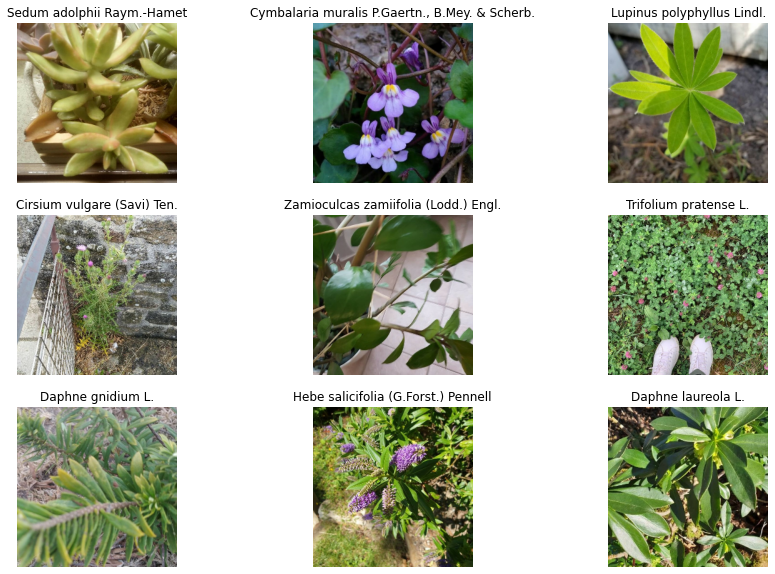

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        f = np.argmax(labels[i])
        plt.title(data[plantnet[f]])
        plt.axis("off")

### autotune images

In [ ]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Training

The PlantNet-300K github repository (https://github.com/plantnet/PlantNet-300K) proposed using the pretrained "resnet50" NN. In order to make this work on the large dataset we had to modify the batch size to 64. But unfortunately the limited resource of google colab did not allow for more than 2 epochs to train at once. Therefore the results were not satisfactory and we decided to not use this the dataset or pathway.



**Results**
The training set contained 3812 images and the validation set 487. Each epoch needed about 1 h to run. The following statistics showed that there was an increase in accuracy with already one epoch.

**epoch 0**:
- loss_train : 4.46
- loss_val : 3.99
- acc_train : 0.15
- acc_val : 0.23 

**epoch 1**:
- loss_train : 3.18
- loss_val : 3.29
- acc_train : 0.32
- acc_val : 0.32 

In [ ]:
!pip install timm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 5.1 MB/s 


In [ ]:
path_to_data = '/content/plantnet_300K/images'
xp1 = 'planet_model'

In [ ]:
env create -f plantnet_300k_env.yml

env: create=-f plantnet_300k_env.yml


In [ ]:
!python main.py --lr=0.05 --n_epochs=2 --k 1 3 5 10 --model=resnet50 --root=/content/plantnet_300K/images --save_name_xp=xp1 --seed=42 --batch_size=64

Seed:	 42
args.k :  [1, 3, 5, 10]
train: 100% 3812/3812 [59:08<00:00,  1.07it/s]
val:   0% 0/487 [00:00<?, ?it/s]/content/epoch.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  batch_proba = F.softmax(batch_output_val)
val: 100% 487/487 [02:31<00:00,  3.21it/s]

epoch 0 took 3705.67
loss_train : 4.46004659602161
loss_val : 3.9933679054793996
acc_train : 0.15042063661260435 / topk_acc_train : {1: 0.15042063661260435, 3: 0.2717656898276456, 5: 0.3441881631381295, 10: 0.45424654389215957}
acc_val : 0.22996336525483643 / topk_acc_val : {1: 0.22996336525483643, 3: 0.3838292949418343, 5: 0.46387942669837395, 10: 0.5746513272061187} / avgk_acc_val : {1: 0.2586927180410052, 3: 0.3984189215245196, 5: 0.47239539816183557, 10: 0.5819461404974613}
train: 100% 3812/3812 [59:20<00:00,  1.07it/s]
val: 100% 487/487 [02:31<00:00,  3.21it/s]

epoch 1 took 3718.14
loss_train : 3.1819731715907267
loss_val : 3.2926592267589805

An additional hindering of this dataset was that the species that were covered in the dataset were not the most common trees in Berlin, eg: "Hypericum androsaemum L." (St. John's Wort).


In [ ]:
data['1358689']


'Hypericum androsaemum L.'